In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import os
import ast

dataset = load_dataset("csv",data_files=os.path.join(os.path.abspath(os.path.join(os.getcwd(),"..")),"data_jobs.csv"))
df = dataset['train'].to_pandas()

df["job_posted_date"]= pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x)if pd.notna(x) else x)

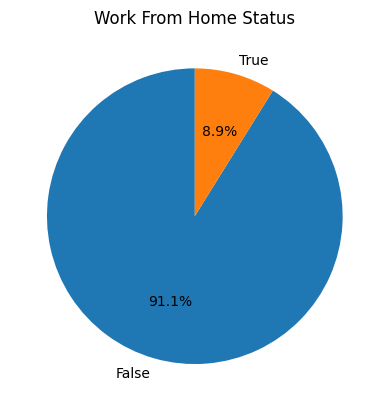

In [11]:
df["job_work_from_home"].value_counts().plot(kind ="pie",startangle= 90,autopct ="%1.1f%%")
plt.title("Work From Home Status")
plt.ylabel("")
plt.show()

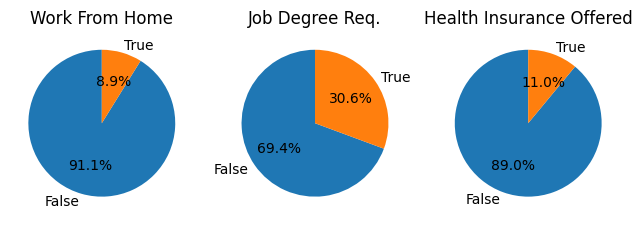

In [24]:
fig,ax = plt.subplots(1,3)

dict_column = {
    "job_work_from_home" :"Work From Home",
    "job_no_degree_mention":"Job Degree Req.",
    "job_health_insurance" :"Health Insurance Offered"
}

for i,pair in enumerate(dict_column.items()):

    ax[i].pie(df[pair[0]].value_counts(),startangle= 90,autopct ="%1.1f%%",labels= ["False","True"])
    ax[i].set_title(pair[1])
  

fig.tight_layout()
plt.show()